In [554]:
# importing necessary libraries to carry out data analysis and visaulaization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # importing necessary libraries to carry out data analysis and visaulaization

In [404]:
# loading the given data set

loan_data = pd.read_csv('loan.csv')

C:\Users\ramar\AppData\Local\Temp\ipykernel_18424\410990688.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


In [406]:
#Identify the shape of the data set ->  rows & columns
loan_data.shape

(39717, 111)

In [408]:
loan_data.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-11  Charged Off   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11

In [410]:
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 120)

In [412]:
# Manual observation shows that there are a lot of columns with NaN values. 
# Finding columns with high percent null values 

high_null_columns = round(loan_data.isnull().sum() / len(loan_data) * 100,2)
high_null_columns.sort_values(ascending=False)


verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [414]:
#Dropping columns with null values greater than 30 percent

drop_columns = loan_data.columns[loan_data.isnull().sum() > len(loan_data)*0.3].to_list()
loan_data = loan_data.drop(columns=drop_columns)

In [416]:
loan_data.shape

(39717, 53)

In [418]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_p

In [420]:
# Finding columns with unique values
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [422]:
single_value_columns = loan_data.columns[loan_data.nunique() == 1].to_list()
single_value_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [424]:
# Dropping columns with single repeated value
loan_data = loan_data.drop(columns=single_value_columns)

In [426]:
loan_data.shape

(39717, 44)

In [428]:
# Dropping categorical columns with high cardinality
loan_data = loan_data.drop(columns=['id','member_id','url'])

In [430]:
loan_data.shape

(39717, 41)

In [432]:
loan_data[['title', 'emp_title', 'purpose']]

title                   emp_title  \
0                       Computer                         NaN   
1                           bike                       Ryder   
2           real estate business                         NaN   
3                       personel         AIR RESOURCES BOARD   
4                       Personal    University Medical Group   
...                          ...                         ...   
39712           Home Improvement             FiSite Research   
39713  Retiring credit card debt  Squarewave Solutions, Ltd.   
39714     MBA Loan Consolidation                         NaN   
39715                   JAL Loan                         NaN   
39716         Consolidation Loan            Evergreen Center   

                  purpose  
0             credit_card  
1                     car  
2          small_business  
3                   other  
4                   other  
...                   ...  
39712    home_improvement  
39713         credit_card  
39714  debt_consolidation  
39715               other  
39716  debt_consolidation  

[39717 rows x 3 columns]

In [434]:
# Title has a high cardinality and is redundant as 'puprpose' covers/categorizes the requirement for which loan was taken. 
# Emp_title, besides having high cardinality, does not provide any visible benefits in analyzing 
# Dropping these columns
loan_data = loan_data.drop(columns=['title', 'emp_title'])

In [436]:
loan_data.shape

(39717, 39)

In [438]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [440]:
#Assessing the spread of zip code
loan_data[['zip_code','addr_state']].groupby('addr_state').nunique()

zip_code
addr_state          
AK                 7
AL                20
AR                17
AZ                14
CA                61
CO                18
CT                10
DC                 1
DE                 4
FL                29
GA                21
HI                 3
IA                 4
ID                 4
IL                38
IN                 7
KS                19
KY                26
LA                14
MA                23
MD                16
ME                 2
MI                21
MN                20
MO                29
MS                 9
MT                10
NC                22
NE                 3
NH                 8
NJ                21
NM                11
NV                 8
NY                60
OH                31
OK                16
OR                 9
PA                50
RI                 3
SC                14
SD                 8
TN                 9
TX                57
UT                10
VA                32
VT                 9
WA                15
WI                18
WV                24
WY                12

In [442]:
#Dropping zipcode as there are many categorical values and regional specific distribution can be checked using state
loan_data = loan_data.drop(columns='zip_code')

In [444]:
loan_data.shape

(39717, 38)

In [446]:
# Dropping columns related to the payments made after approval as these do not reflect the user's behavior at the time of applying for loan

payment_columns = [
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d', 
    'last_pymnt_amnt'
]
loan_data = loan_data.drop(columns=payment_columns)

In [448]:
loan_data.shape

(39717, 31)

In [450]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [452]:
# out_prncp and put_prncp_inv correspond to remaining principal resulting after payments made. 
# Recoveris and collection_recovery_fee are charges applied after cahrge off. 
# last_credit_pull_d refers to the last date when the credit score was pulled. This does not help is assessing users probability of defaulting
# Hence they are not helpful for defaulting

to_drop_columns = ['out_prncp','out_prncp_inv', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee']

#Dropping the columns
loan_data = loan_data.drop(columns=to_drop_columns)

In [454]:
loan_data.shape

(39717, 26)

## Data Cleaning

In [457]:
# Removing records of ongoing payments as those do not help in prediciting defaults
# Retaining Charged off and Fully paid help in identifying patterns for useful and defaulitng loans, respectively

loan_data = loan_data [loan_data.loan_status != 'Current']
loan_data.shape

(38577, 26)

In [459]:
# Cleaning null values
# Checking percent null values within the columns
round((loan_data.isnull().sum() / len(loan_data))*100,2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.13
total_acc               0.00
pub_rec_bankruptcies    1.81
dtype: float64

In [461]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [463]:
# Cleaning and standardizing Employment length values
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [465]:
emp_len_map = {'1 year': 1, '2 years': 2, '4 years': 3, '6 years': 6, '< 1 year': 0.5, '7 years':7,
       '10+ years':10, '3 years':3, '8 years':8, '5 years':5, '9 years':9}
loan_data.emp_length = loan_data.emp_length.map(emp_len_map)

In [467]:
loan_data.emp_length.dtype

dtype('float64')

In [469]:
loan_data.emp_length.isna().sum()

1033

In [471]:
loan_data.emp_length.describe()

count    37544.000000
mean         4.911997
std          3.513583
min          0.500000
25%          2.000000
50%          3.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [473]:
loan_data.emp_length.value_counts()

emp_length
10.0    8488
3.0     7354
0.5     4508
2.0     4291
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

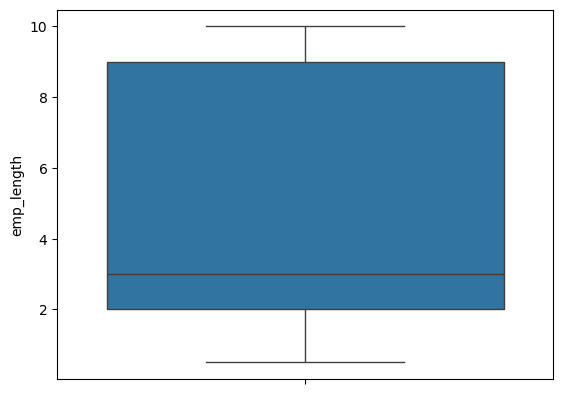

In [475]:
sb.boxplot(loan_data.emp_length)
plt.show()

In [477]:
# Filling the missing values with mean ~5.0 as there are no significant outliers
loan_data.emp_length=loan_data.emp_length.fillna(5.0)

In [479]:
loan_data.emp_length.isnull().sum()

0

In [481]:
# handling missing revoliving credit utilization
loan_data.revol_util.isna().sum()

50

In [483]:
loan_data.revol_util.value_counts()

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [487]:
# Updating with mode - 0% as there are very few missing values
loan_data.revol_util = loan_data.revol_util.fillna('0%')

In [489]:
loan_data.pub_rec_bankruptcies.isna().sum()

697

In [491]:
loan_data.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [493]:
loan_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [495]:
# Replacing with median value
loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.fillna(0)

In [497]:
loan_data.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [499]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  float64
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

## Data standardizing

In [502]:
# Removing trailing % symbol
loan_data.int_rate = loan_data.int_rate.apply(lambda rate: float(rate.strip('%')))

In [504]:
loan_data.int_rate.dtype

dtype('float64')

In [512]:
# Removing trailing % symbol
loan_data.revol_util = loan_data.revol_util.apply(lambda x: x.strip('%'))
loan_data.drop(columns='revol_util_perc')

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months     10.65   
1           2500         2500           2500.0   60 months     15.27   
2           2400         2400           2400.0   36 months     15.96   
3          10000        10000          10000.0   36 months     13.49   
5           5000         5000           5000.0   36 months      7.90   
...          ...          ...              ...         ...       ...   
39712       2500         2500           1075.0   36 months      8.07   
39713       8500         8500            875.0   36 months     10.28   
39714       5000         5000           1325.0   36 months      8.07   
39715       5000         5000            650.0   36 months      7.43   
39716       7500         7500            800.0   36 months     13.75   

       installment grade sub_grade  emp_length home_ownership  annual_inc  \
0           162.87     B        B2        10.0           RENT     24000.0   
1            59.83     C        C4         0.5           RENT     30000.0   
2            84.33     C        C5        10.0           RENT     12252.0   
3           339.31     C        C1        10.0           RENT     49200.0   
5           156.46     A        A4         3.0           RENT     36000.0   
...            ...   ...       ...         ...            ...         ...   
39712        78.42     A        A4         3.0       MORTGAGE    110000.0   
39713       275.38     C        C1         3.0           RENT     18000.0   
39714       156.84     A        A4         0.5       MORTGAGE    100000.0   
39715       155.38     A        A2         0.5       MORTGAGE    200000.0   
39716       255.43     E        E2         0.5            OWN     22000.0   

      verification_status issue_d  loan_status             purpose addr_state  \
0                Verified  Dec-11   Fully Paid         credit_card         AZ   
1         Source Verified  Dec-11  Charged Off                 car         GA   
2            Not Verified  Dec-11   Fully Paid      small_business         IL   
3         Source Verified  Dec-11   Fully Paid               other         CA   
5         Source Verified  Dec-11   Fully Paid             wedding         AZ   
...                   ...     ...          ...                 ...        ...   
39712        Not Verified  Jul-07   Fully Paid    home_improvement         CO   
39713        Not Verified  Jul-07   Fully Paid         credit_card         NC   
39714        Not Verified  Jul-07   Fully Paid  debt_consolidation         MA   
39715        Not Verified  Jul-07   Fully Paid               other         MD   
39716        Not Verified  Jun-07   Fully Paid  debt_consolidation         MA   

         dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0      27.65            0           Jan-85               1         3        0   
1       1.00            0           Apr-99               5         3        0   
2       8.72            0           Nov-01               2         2        0   
3      20.00            0           Feb-96               1        10        0   
5      11.20            0           Nov-04               3         9        0   
...      ...          ...              ...             ...       ...      ...   
39712  11.33            0           Nov-90               0        13        0   
39713   6.40            1           Dec-86               1         6        0   
39714   2.30            0           Oct-98               0        11        0   
39715   3.72            0           Nov-88               0        17        0   
39716  14.29            1           Oct-03               0         7        0   

       revol_bal revol_util  total_acc  pub_rec_bankruptcies  
0          13648      83.70          9                   0.0  
1           1687       9.40          4                   0.0  
2           2956      98.50         10                   0.0  
3           5598   

In [514]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0     B        B2        10.0           RENT     24000.0            Verified   
1     C        C4         0.5           RENT     30000.0     Source Verified   
2     C        C5        10.0           RENT     12252.0        Not Verified   
3     C        C1        10.0           RENT     49200.0     Source Verified   
5     A        A4         3.0           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0  Dec-11   Fully Paid     credit_card         AZ  27.65            0   
1  Dec-11  Charged Off             car         GA   1.00            0   
2  Dec-11   Fully Paid  small_business         IL   8.72            0   
3  Dec-11   Fully Paid           other         CA  20.00            0   
5  Dec-11   Fully Paid         wedding         AZ  11.20            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648      83.70   
1           Apr-99               5         3        0       1687       9.40   
2           Nov-01               2         2        0       2956      98.50   
3           Feb-96               1        10        0       5598         21   
5           Nov-04               3         9        0       7963      28.30   

   total_acc  pub_rec_bankruptcies revol_util_perc  
0          9                   0.0           83.70  
1          4                   0.0            9.40  
2         10                   0.0           98.50  
3         37                   0.0              21  
5         12                   0.0           28.30

## Outlier Treatment

In [550]:
# Checking the distribution of annual incomes
loan_data.annual_inc.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [562]:
# As per the above data, 95% of the borrower's income is below 140000
# Hence removing the records and storinng then in a new data frame for additional anlaysis if needed
loan_data_high_Income = loan_data[loan_data.annual_inc > 150000]
loan_data_high_Income.shape

(1486, 27)

In [574]:
#Dropping the records stored in 'loan_data_high_Income'
loan_data = loan_data[~(loan_data.annual_inc > 150000)]

#Dropping the records with laon_status 'Current' as it does not give insights in predicting defaults
loan_data = loan_data[ loan_data.loan_status != 'Current']
loan_data.shape

(37091, 27)

In [578]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [590]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0     B        B2        10.0           RENT     24000.0            Verified   
1     C        C4         0.5           RENT     30000.0     Source Verified   
2     C        C5        10.0           RENT     12252.0        Not Verified   
3     C        C1        10.0           RENT     49200.0     Source Verified   
5     A        A4         3.0           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0  Dec-11   Fully Paid     credit_card         AZ  27.65            0   
1  Dec-11  Charged Off             car         GA   1.00            0   
2  Dec-11   Fully Paid  small_business         IL   8.72            0   
3  Dec-11   Fully Paid           other         CA  20.00            0   
5  Dec-11   Fully Paid         wedding         AZ  11.20            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648      83.70   
1           Apr-99               5         3        0       1687       9.40   
2           Nov-01               2         2        0       2956      98.50   
3           Feb-96               1        10        0       5598         21   
5           Nov-04               3         9        0       7963      28.30   

   total_acc  pub_rec_bankruptcies revol_util_perc  
0          9                   0.0           83.70  
1          4                   0.0            9.40  
2         10                   0.0           98.50  
3         37                   0.0              21  
5         12                   0.0           28.30

In [592]:
loan_data = loan_data.drop(columns='revol_util')

In [594]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37091 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37091 non-null  int64  
 1   funded_amnt           37091 non-null  int64  
 2   funded_amnt_inv       37091 non-null  float64
 3   term                  37091 non-null  object 
 4   int_rate              37091 non-null  float64
 5   installment           37091 non-null  float64
 6   grade                 37091 non-null  object 
 7   sub_grade             37091 non-null  object 
 8   emp_length            37091 non-null  float64
 9   home_ownership        37091 non-null  object 
 10  annual_inc            37091 non-null  float64
 11  verification_status   37091 non-null  object 
 12  issue_d               37091 non-null  object 
 13  loan_status           37091 non-null  object 
 14  purpose               37091 non-null  object 
 15  addr_state            37

## Loan Status Summary

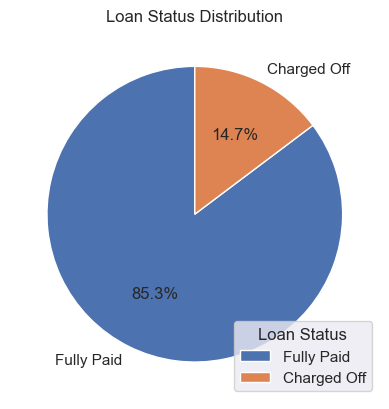

In [799]:
# Get the counts and labels
counts = loan_data.loan_status.value_counts()
labels = counts.index  # Extract labels (e.g., 'Fully Paid', 'Charged Off')

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add legend
plt.legend(labels, loc="lower right", title="Loan Status")

# Add title
plt.title("Loan Status Distribution")

# Show the plot
plt.show()

## Univariate Ananlysis
- List of numeric vairable
  -  loan_amnt
  -  funded_amnt
  -  funded_amnt_inv
  -  annual_inc
  -  dti
  -  int_rate
  -  revol_bal
  -  revol_util
- List of Categorical Variables
  -  emp_length
  -  term
  -  grade
  -  subgrade
  -  home ownership
  -  loan_status
  -  verification_status
  -  purpose
 
- **Note:** 'loan_status' is the variable of our interest for determining the application status
- As a part of this analysis we'll verify the distribution of numeric variables

In [597]:
# Apply the default theme
sns.set_theme()

In [599]:
# 
# Drop duplicate rows
loan_data.drop_duplicates(inplace=True)

# Drop rows with missing target variable
loan_data = loan_data.dropna(subset=['loan_status'])

# Convert numerical variables to numeric
numeric_cols = ['annual_inc','funded_amnt','int_rate','installment', 'dti', 'revol_util_perc', 'pub_rec_bankruptcies', 'pub_rec','open_acc', 'delinq_2yrs' ]
for col in numeric_cols:
    loan_data[col] = pd.to_numeric(loan_data[col], errors='coerce')

# Remove rows with missing or invalid values
loan_data = loan_data.dropna(subset=numeric_cols)

# Confirm cleaning results
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37091 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37091 non-null  int64  
 1   funded_amnt           37091 non-null  int64  
 2   funded_amnt_inv       37091 non-null  float64
 3   term                  37091 non-null  object 
 4   int_rate              37091 non-null  float64
 5   installment           37091 non-null  float64
 6   grade                 37091 non-null  object 
 7   sub_grade             37091 non-null  object 
 8   emp_length            37091 non-null  float64
 9   home_ownership        37091 non-null  object 
 10  annual_inc            37091 non-null  float64
 11  verification_status   37091 non-null  object 
 12  issue_d               37091 non-null  object 
 13  loan_status           37091 non-null  object 
 14  purpose               37091 non-null  object 
 15  addr_state            37

#### Loan Amount Distribution

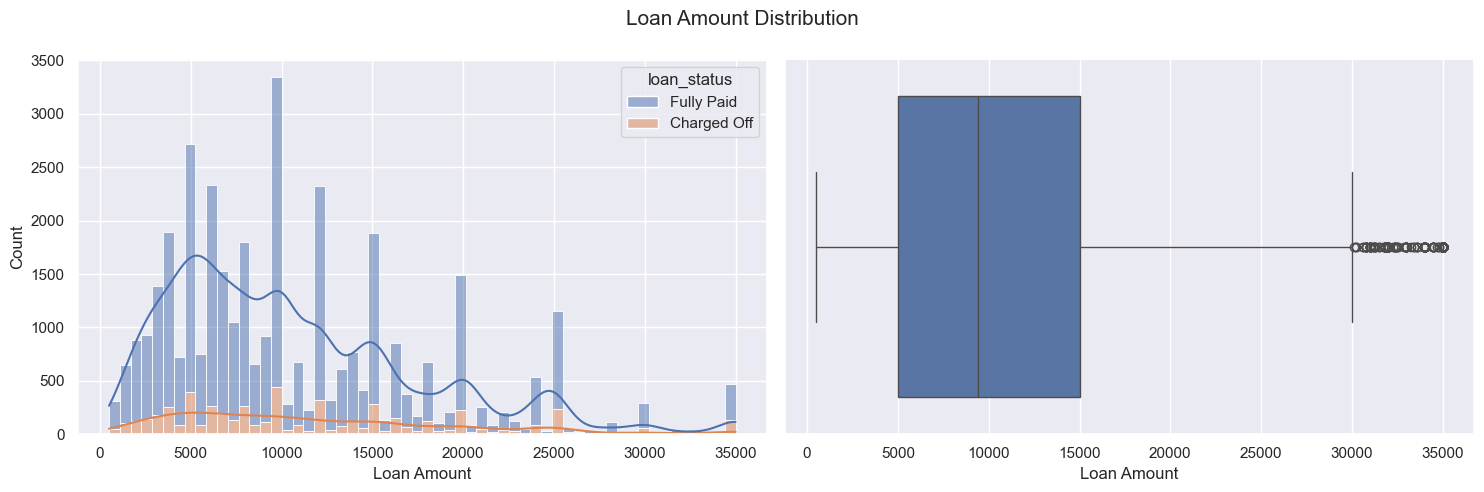

In [605]:
# Create a visualization
# Incresing the plot area and assigning the title

plt.figure(figsize=(15,5))
plt.suptitle('Loan Amount Distribution', fontsize=15)

plt.subplot(1,2,1)
sns.histplot(data=loan_data, x='loan_amnt', hue='loan_status', kde=True, multiple = 'stack')
plt.xlabel("Loan Amount")


plt.subplot(1,2,2)
sns.boxplot(data=loan_data, x='loan_amnt')
plt.xlabel("Loan Amount")

plt.tight_layout()
plt.show()

In [607]:
loan_data.loan_amnt.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

count    37091.000000
mean     10754.193066
std       7107.767017
min        500.000000
10%       3000.000000
25%       5000.000000
50%       9425.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

- The above distribution shows that most of the loans are within the range of 5000 to 15000 (Assuming USD).
- High loans of > ~25000 are taken but in small numbers. Hence are outliers. However this could verified if needed to check for default risks
- It is also be observed that Charged Off loan follow similar distribution as loan amount

#### Funding amount

In [618]:
perc_funding = round(loan_data.funded_amnt_inv / df.funded_amnt *100,2)

In [866]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)
perc_funding.value_counts().head(120)

100.00    18786
99.75       384
99.50       377
99.58       318
99.79       295
99.88       277
99.83       245
99.17       242
98.75       234
99.38       233
99.90       232
99.00       232
98.33       199
97.50       196
99.69       193
99.86       172
99.64       154
99.84       153
99.67       150
97.92       149
95.00       146
0.00        145
99.80       128
99.82       120
99.93       119
99.72       119
98.00       119
99.89       113
99.29       111
99.62       105
95.83        99
99.77        98
99.81        95
99.92        94
99.48        93
99.74        92
99.25        91
98.50        89
98.96        88
99.87        86
98.44        82
99.55        82
99.44        81
99.85        78
96.67        76
99.91        74
99.71        73
99.31        72
99.65        72
99.70        70
98.21        69
99.78        68
93.75        67
99.76        65
99.33        64
90.00        62
96.88        61
99.11        60
99.73        59
99.60        58
98.61        58
99.40        57
98.12   

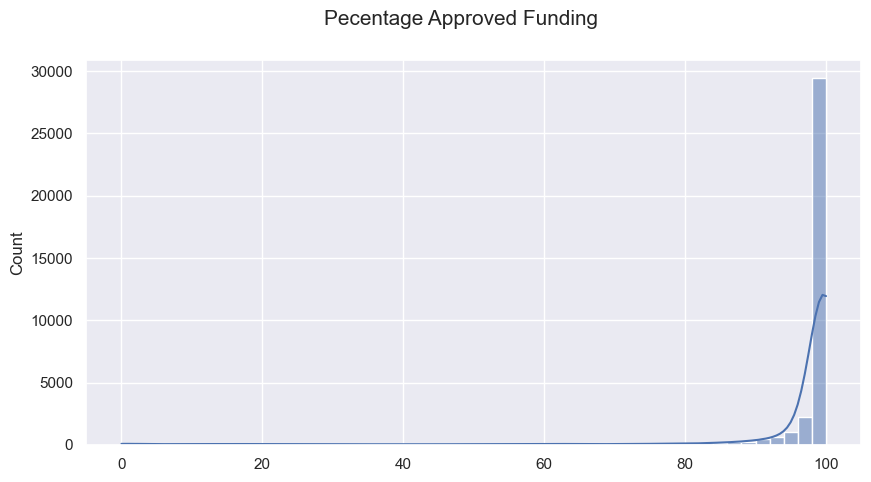

In [622]:
plt.figure(figsize=(10,5))
plt.suptitle('Pecentage Approved Funding', fontsize=15)
sns.histplot(data=perc_funding, bins=50, kde=True)
plt.show()

Seems like the > 95% of the applied amounts were funded

#### Annual Income

In [625]:
loan_data.annual_inc.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,1])

count     37091.000000
mean      61875.090474
std       29125.064445
min        4000.000000
10%       29544.000000
25%       40000.000000
50%       56650.000000
75%       79000.000000
90%      103000.000000
95%      120000.000000
100%     150000.000000
max      150000.000000
Name: annual_inc, dtype: float64

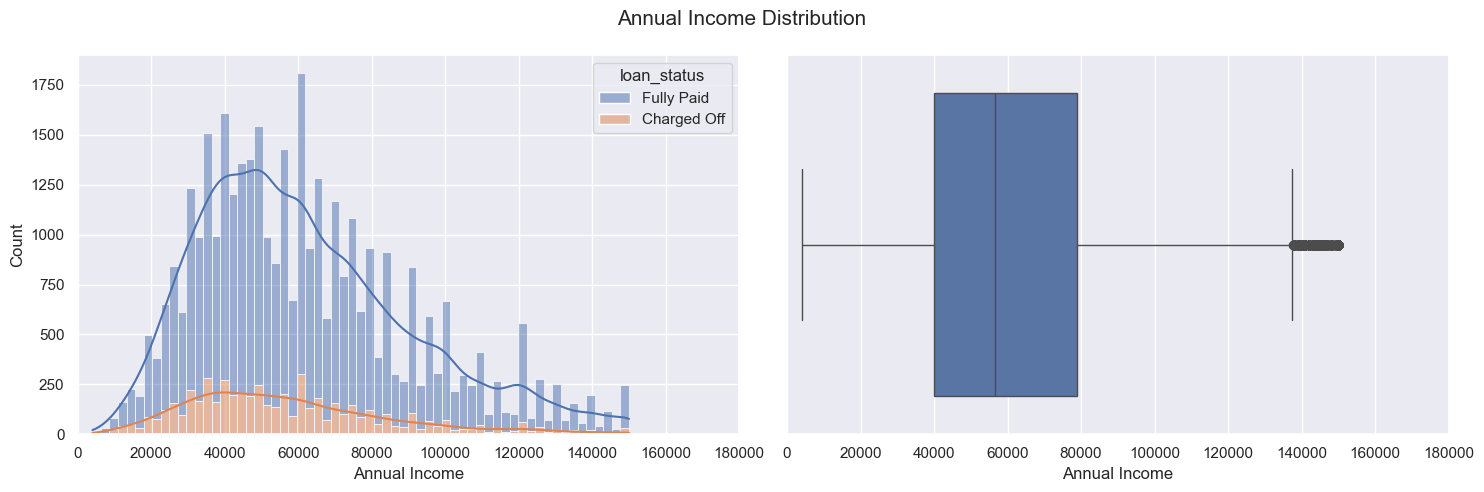

In [801]:

# Incresing the plot area and assigning the title
plt.figure(figsize=(15,5))
plt.suptitle('Annual Income Distribution', fontsize=15)

# Creating  a subplot for 2 plots in 1 row
plt.subplot(1,2,1)

# Adjust x-axis range to avoid extreme outliers
plt.xlim(0, 180000)  # Set the range based on the bulk of the data

# Disable scientific notation on x-axis
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Annual Income')

sns.histplot(data=loan_data, x='annual_inc', hue='loan_status', multiple='stack', kde = True)

plt.subplot(1,2,2)

plt.xlim(0,180000)
plt.ticklabel_format(style = 'plain', axis='x')
sns.boxplot(data=loan_data, x='annual_inc')
plt.xlabel('Annual Income')

plt.tight_layout()
plt.show()

- Annual income of majority is <200000
- Bulk of income group earns between 40000 - 80000

#### Interest Rate

In [632]:
loan_data.int_rate.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,1])

count    37091.000000
mean        11.893714
std          3.672804
min          5.420000
10%          6.990000
25%          8.940000
50%         11.710000
75%         14.300000
90%         16.770000
95%         18.250000
100%        24.400000
max         24.400000
Name: int_rate, dtype: float64

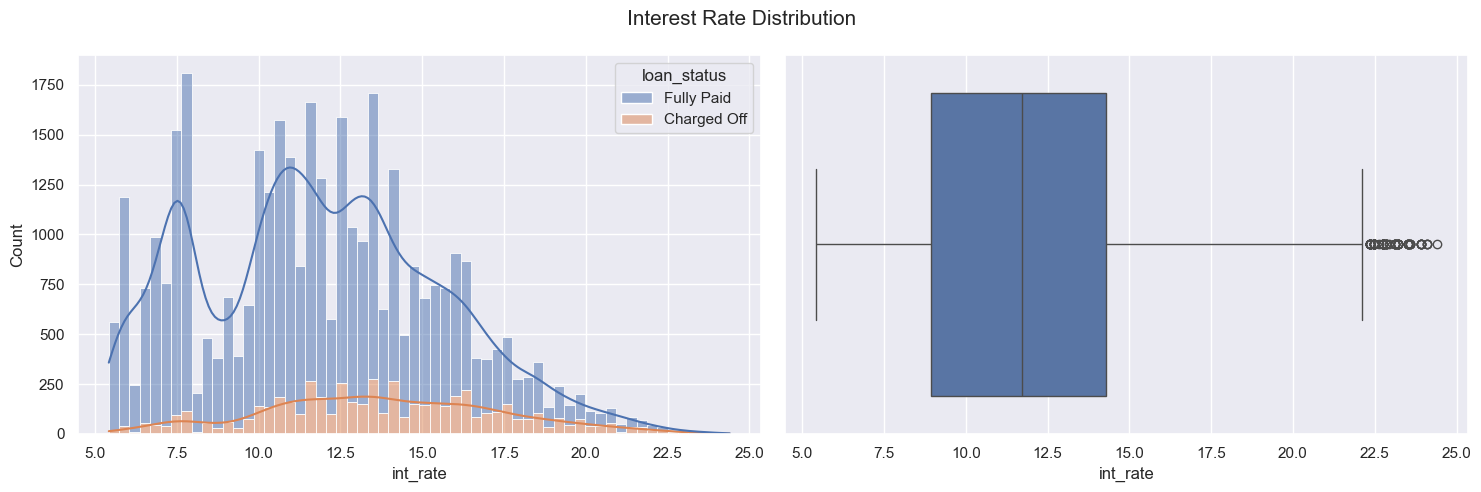

In [634]:
plt.figure(figsize=(15,5))
plt.suptitle('Interest Rate Distribution', fontsize=15)
plt.subplot(1,2,1)
sns.histplot(data=loan_data, x='int_rate', hue='loan_status', multiple='stack', kde = True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data, x='int_rate')

plt.tight_layout()
plt.show()

Let us check the interest rate distribution for just charged off loans to see if there is a variation

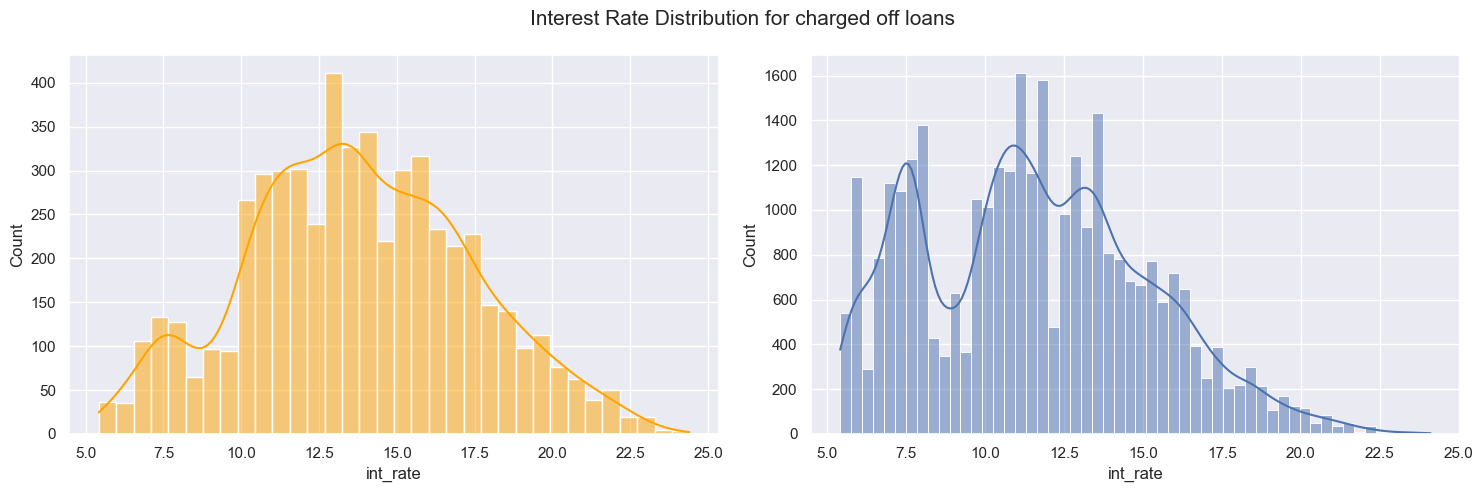

In [637]:
plt.figure(figsize=(15,5))
plt.suptitle('Interest Rate Distribution for charged off loans', fontsize=15)
plt.subplot(1,2,1)
sns.histplot(data=loan_data.int_rate[df.loan_status == 'Charged Off'], color='orange',kde = True)
plt.subplot(1,2,2)
sns.histplot(data=loan_data.int_rate[df.loan_status == 'Fully Paid'], kde = True)

plt.tight_layout()
plt.show()

In [639]:
loan_data.int_rate[loan_data.loan_status == 'Charged Off'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,1])

count    5464.000000
mean       13.770602
std         3.637150
min         5.420000
10%         8.900000
25%        11.260000
50%        13.490000
75%        16.320000
90%        18.640000
95%        20.012000
100%       24.400000
max        24.400000
Name: int_rate, dtype: float64

In [641]:
loan_data.int_rate[loan_data.loan_status == 'Fully Paid'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,1])

count    31627.000000
mean        11.569456
std          3.580667
min          5.420000
10%          6.920000
25%          8.490000
50%         11.490000
75%         13.980000
90%         16.350000
95%         17.580000
100%        24.110000
max         24.110000
Name: int_rate, dtype: float64

- Majority of the good loans loans have interest rates rangin between ~8.5 - 14% in general
- Charged Off loans were relatively given at a higher interest rate of ~11% - 16.4%
- The higher interest could add more burnden on the borrower resulting in defaults
- There are outlier interes rate above 22.5%. It would be interseting to see how the loans fared for such interest rates

##### Verifying the distribution of high interest  loans

In [647]:
df_high_int = loan_data [loan_data.int_rate > 22.0]
df_high_int.shape

(138, 26)

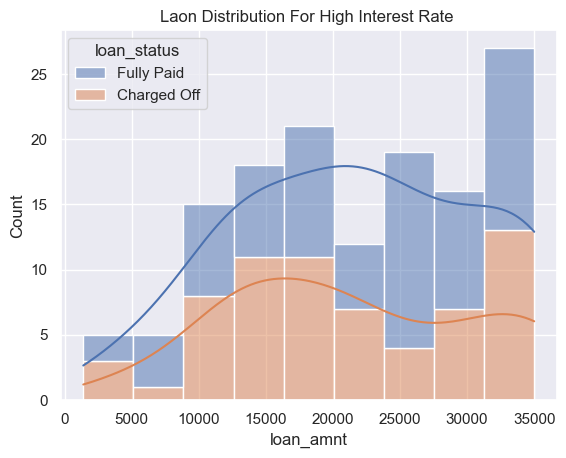

In [649]:
plt.title('Laon Distribution For High Interest Rate ')
sns.histplot(data=df_high_int, x='loan_amnt', hue='loan_status', multiple='stack', kde=True)
plt.show()

In [651]:
df_high_int.loan_status.value_counts()

loan_status
Fully Paid     73
Charged Off    65
Name: count, dtype: int64

It seems that **47%** of the loans default with high interest rates.

#### DTI
- Debt to interest ratio
- Calculated as (debt payments per month/ gross monthly income)*100
- Metric to assess a borrowers ability to repay debts
- DTI **< 35%** considered **good**

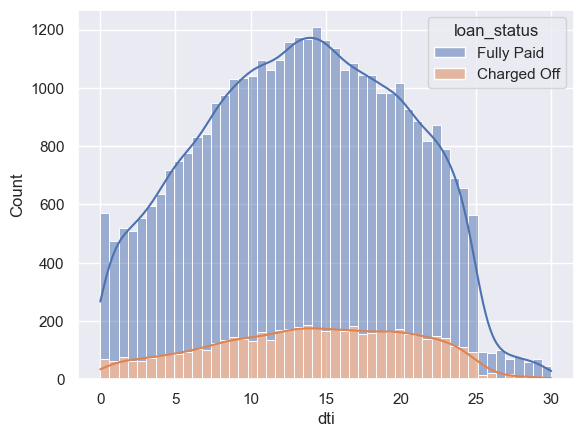

In [655]:
sns.histplot(data=loan_data, x='dti', hue='loan_status', multiple='stack', kde=True)
plt.show()

- Follows normal distribution
- LC funded users having good dti overall
- However, It can be observed that the DTI distribution for the defaulted customers is skewed a little towards the right

In [658]:
loan_data.installment[loan_data.loan_status=='Charged Off'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])

count    5464.000000
mean      329.545609
std       211.900465
min        22.790000
10%        97.333000
25%       167.490000
50%       287.330000
75%       445.040000
90%       632.889000
95%       773.440000
max      1305.190000
Name: installment, dtype: float64

In [662]:
loan_data.installment[loan_data.loan_status=='Fully Paid'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95])

count    31627.000000
mean       311.240445
std        198.844728
min         15.690000
10%         98.260000
25%        162.885000
50%        269.230000
75%        406.895000
90%        587.790000
95%        706.443000
max       1288.100000
Name: installment, dtype: float64

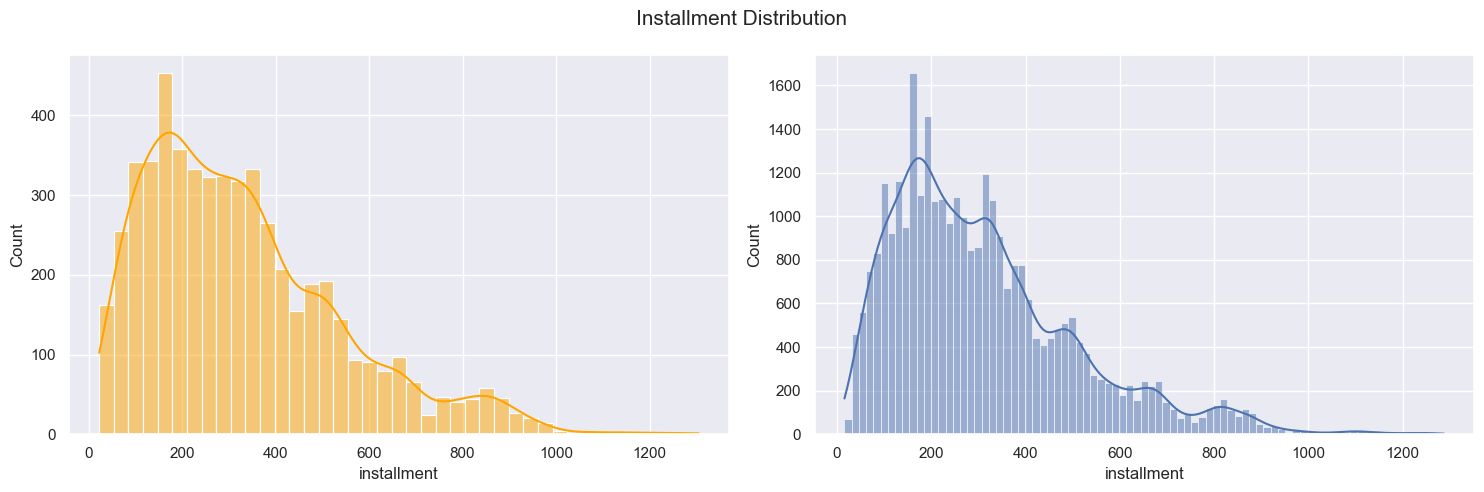

In [666]:
plt.figure(figsize=(15,5))
plt.suptitle('Installment Distribution', fontsize=15)
plt.subplot(1,2,1)
sns.histplot(data=loan_data.installment[loan_data.loan_status == 'Charged Off'], color='orange',kde = True)
plt.subplot(1,2,2)
sns.histplot(data=loan_data.installment[loan_data.loan_status == 'Fully Paid'], kde = True)

plt.tight_layout()
plt.show()

## Segmented univariate analysis

- List of Categorical Variables which can be used for segments for verification
  - emp_length
  - term
  - grade
  - subgrade
  - home ownership
  - loan_status
  - verification_status
  - purpose

#### Segmented Univariate Analysis with numerical data

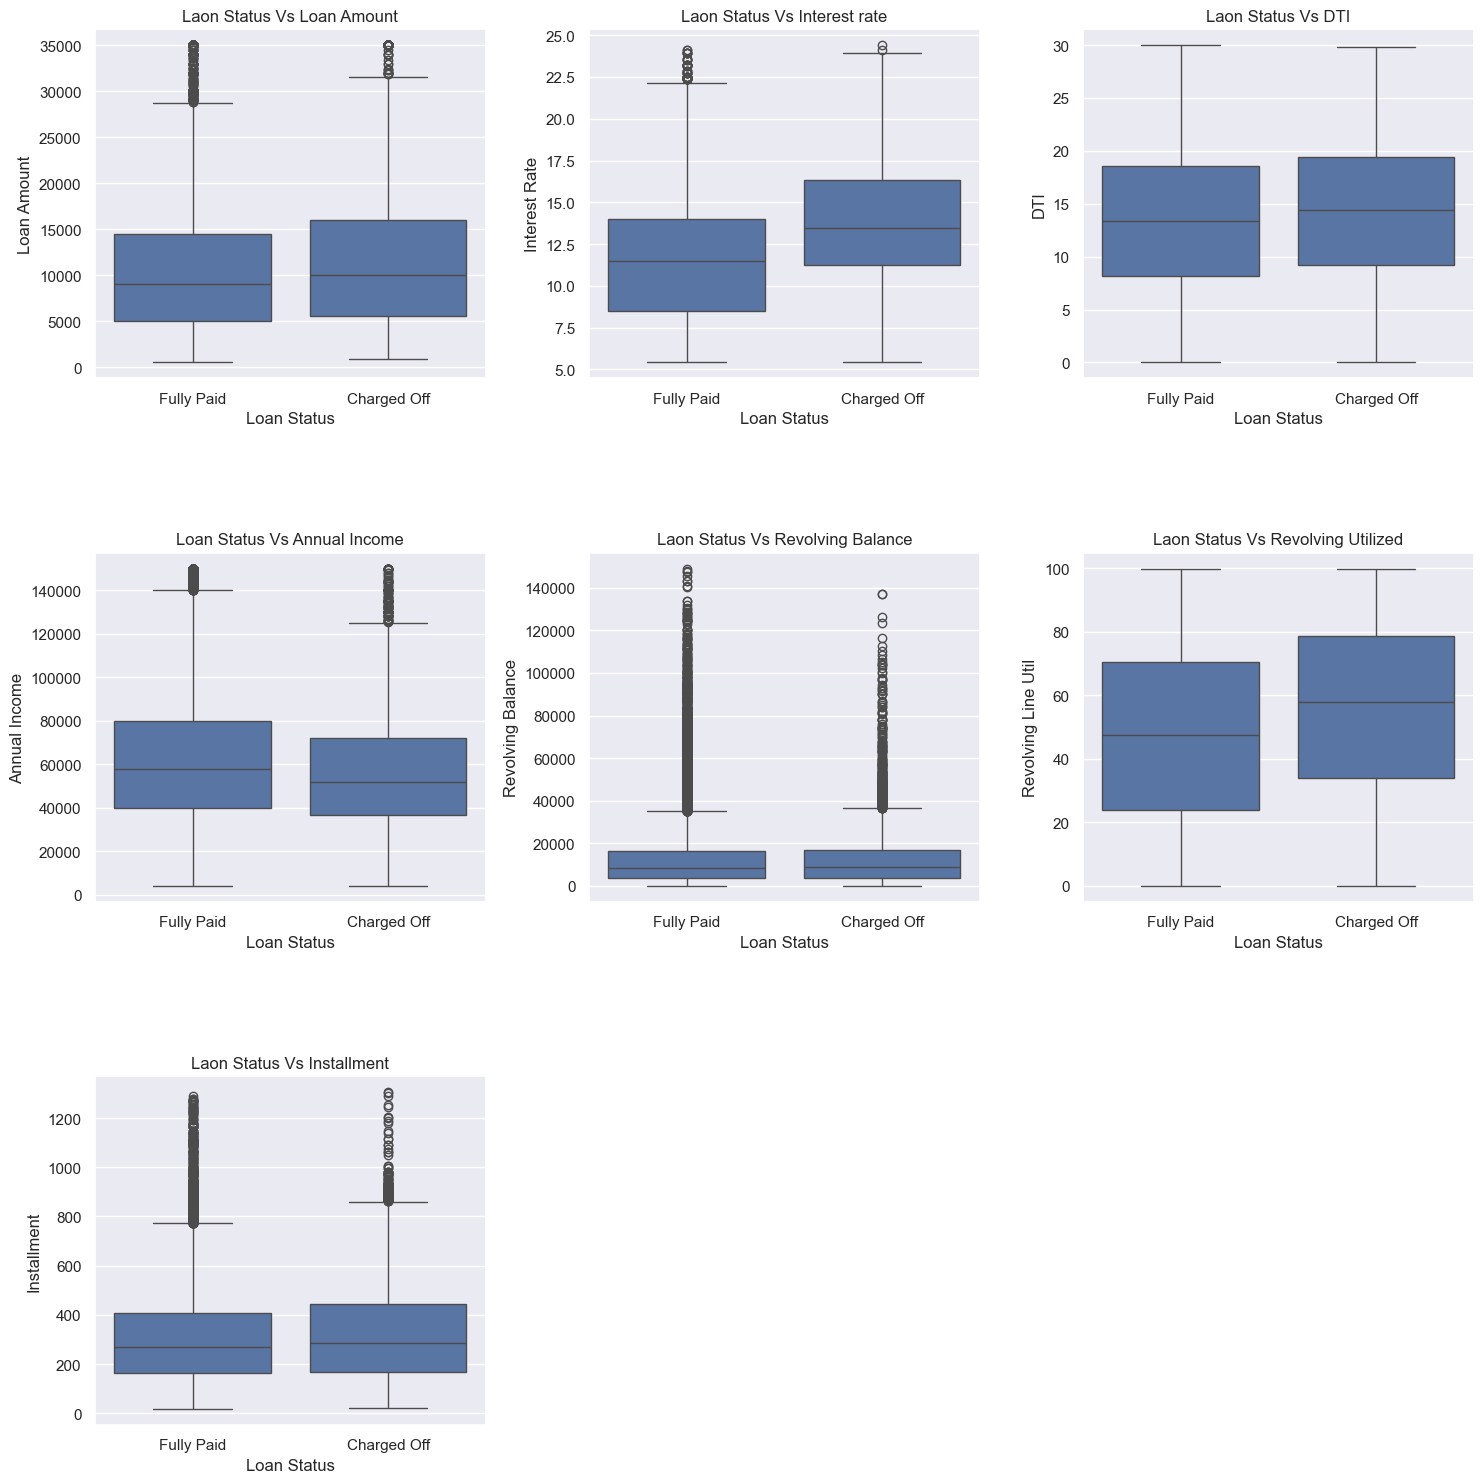

In [890]:
# Laon Amount vs other numerical variables

plt.figure(figsize=(15,15))

#Defining dictinary with numerical vaiables
Numeric_vars = {
    'loan_amnt':[1,'Loan Amount','Laon Status Vs Loan Amount'], 
    'int_rate': [2,'Interest Rate','Laon Status Vs Interest rate'], 
    'dti': [3,'DTI','Laon Status Vs DTI'], 
    'annual_inc': [4,'Annual Income', 'Loan Status Vs Annual Income'], 
    'revol_bal': [5,'Revolving Balance','Laon Status Vs Revolving Balance'],
    'revol_util_perc': [6,'Revolving Line Util','Laon Status Vs Revolving Utilized'],
    'installment': [7,'Installment','Laon Status Vs Installment']}

#Looping each numerical variable for plotting 
for var in Numeric_vars:
    plt.subplot(3,3,Numeric_vars[var][0])
    plt.title(Numeric_vars[var][2])
    sns.boxplot(data=loan_data, x='loan_status', y=var)
    plt.xlabel('Loan Status')
    plt.ylabel(Numeric_vars[var][1])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5) 
plt.show()

- As can be seeen above,
    - Charged off loans are associated with high interest rates. This aligns with expectations, as higher rates are often given to riskier borrowers.
    - Charged off loans go up as the loan amount also increases. This could attribute to the higher financial stress.
    - Charged off loans tend to go start with lower incomes. However, there is not much variation in distribution
    - High dti also impacts the risk of default
    - Risk of defaulting increases as the consuimption of Revolving utilization percentage increases. Higher median indicates that borrowers who consume more of their available revolving balance are likely under finiancial stress and more likely to default
    - Borrowers paying higher intallments are a little more likely to default

#### Segmented Univariate Analysis using categorical data

- List of Categorical Variables
  -  emp_length
  -  term
  -  grade
  -  subgrade
  -  home ownership
  -  loan_status
  -  verification_status
  -  purpose

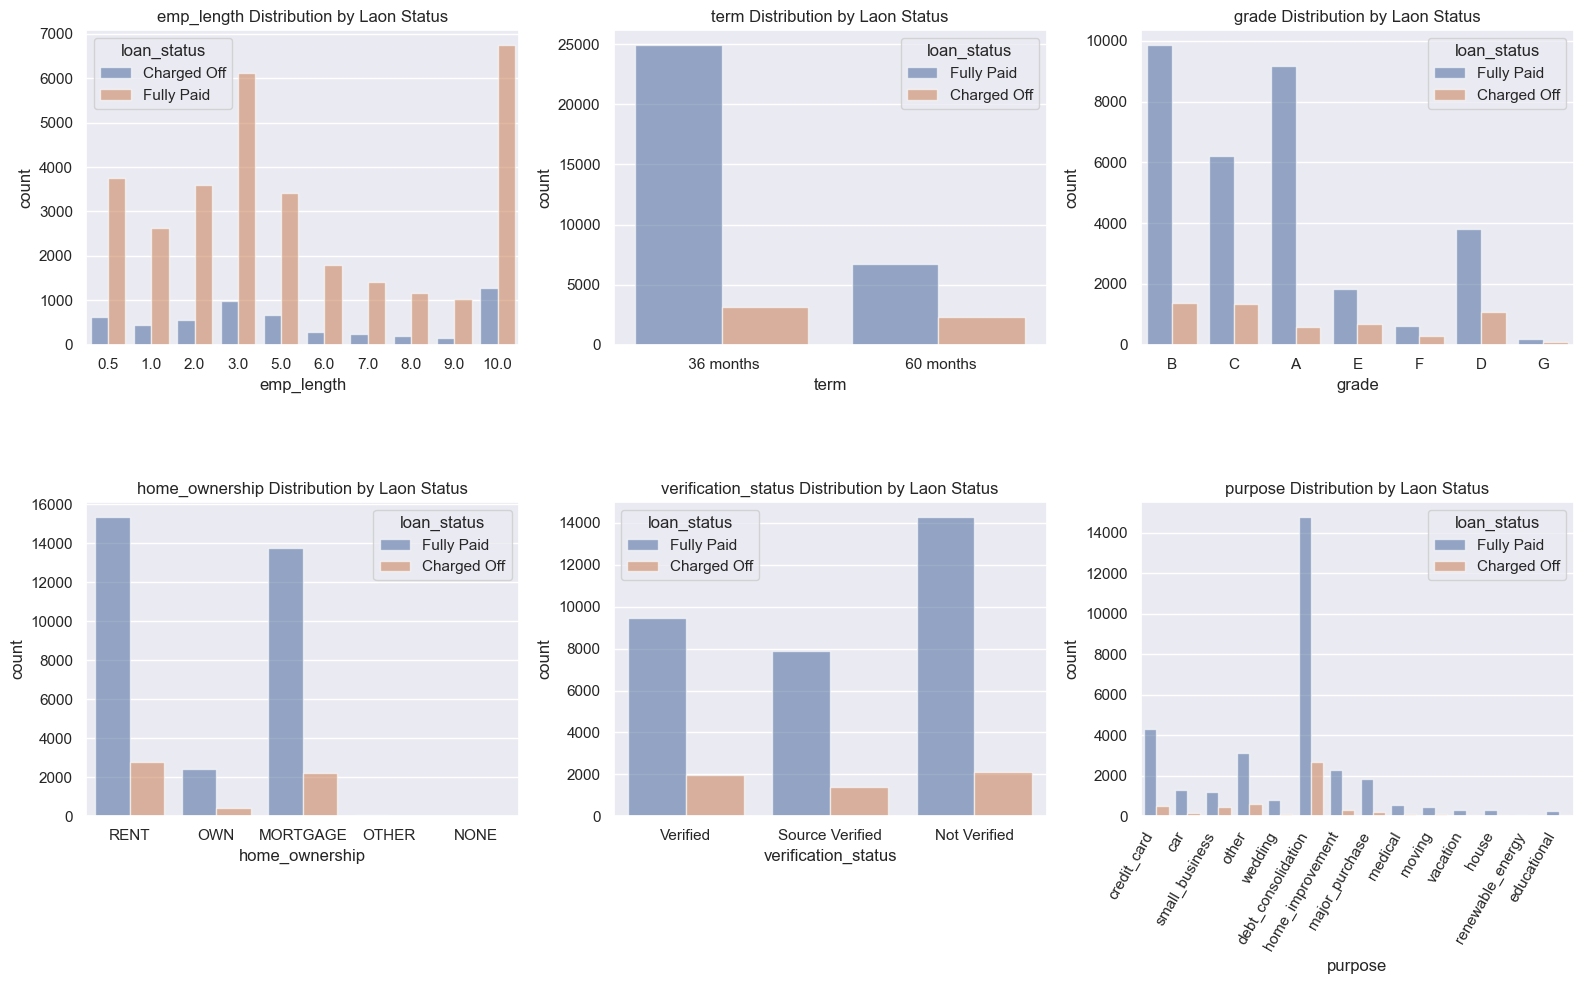

In [685]:
# Looping categories to reduce to code
categorical_vars = ['emp_length', 'term', 'grade', 'home_ownership', 'verification_status', 'purpose']
plt.figure(figsize=(16,10))
for category in categorical_vars:
    plt.subplot(2,3,categorical_vars.index(category)+1)
    plt.title(f'{category} Distribution by Laon Status')
    sns.countplot(data=loan_data,x=category,hue='loan_status', alpha=0.6)
    if category == 'purpose':
        plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5) 
plt.show()

The above break down are interesting but need to be verified to check proportions of fully paid and charged off loans

In [696]:
loan_data.home_ownership.value_counts()

home_ownership
RENT        18135
MORTGAGE    15980
OWN          2880
OTHER          93
NONE            3
Name: count, dtype: int64

In [708]:
# Since home ownership "NONE" contribute to very less amount of data, dropping them
loan_data=loan_data[loan_data.home_ownership !='NONE']
loan_data.home_ownership.value_counts()

home_ownership
RENT        18135
MORTGAGE    15980
OWN          2880
OTHER          93
Name: count, dtype: int64

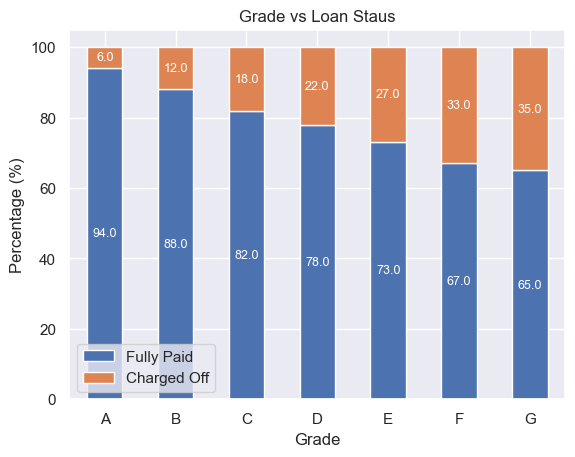

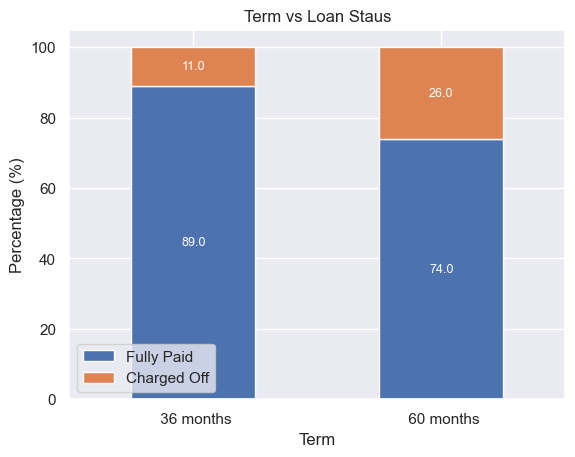

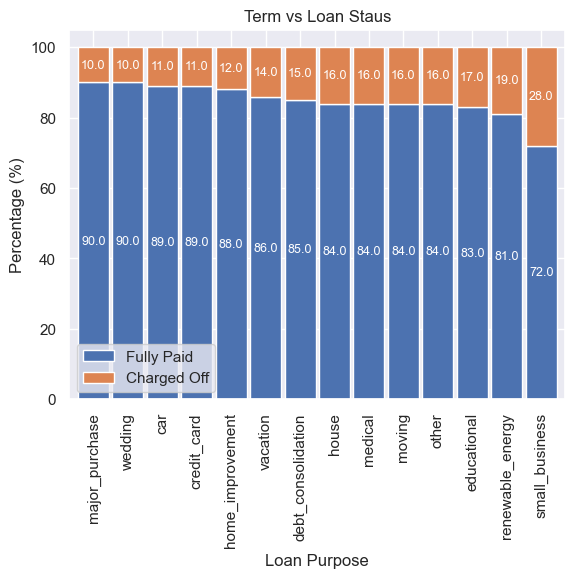

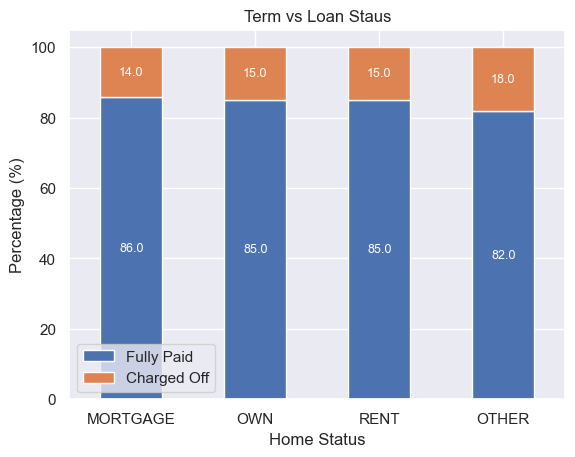

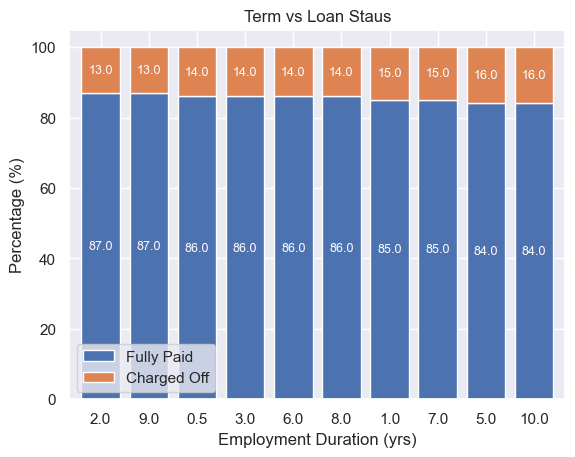

In [872]:

def perc_plot(index, title, xlabel, width = 0.5, rotation=0):
    pivot_table = loan_data.pivot_table(
        values='loan_amnt',  # Use 'loan_amnt' to count loans
        index=index,       # Group by 'index'
        columns='loan_status',  # Separate by 'loan_status'
        aggfunc='count',     # Aggregate using the count function
        fill_value=0         # Replace NaN with 0
    )
    
    pvt_data=pivot_table[['Fully Paid', 'Charged Off']].apply(lambda x: round(x/x.sum()*100), axis=1).sort_values(by='Charged Off').plot(kind='bar', stacked=True, width=width)
    
    for container in pvt_data.containers:
        labels = [v if v>0 else '' for v in container.datavalues ]
        pvt_data.bar_label(container, labels=labels, label_type='center', fontsize=9, color='white')
    
    pvt_data.legend(loc='lower left')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xlabel(xlabel)
    plt.xticks(rotation=rotation)
    plt.show()

perc_plot(index='grade', title='Grade vs Loan Staus', xlabel= 'Grade')
perc_plot(index='term', title='Term vs Loan Staus', xlabel= 'Term')
perc_plot(index='purpose', title='Term vs Loan Staus',  xlabel= 'Loan Purpose',width=0.9, rotation=90)
perc_plot(index='home_ownership', title='Term vs Loan Staus',  xlabel= 'Home Status')
perc_plot(index='emp_length', title='Term vs Loan Staus',  xlabel= 'Employment Duration (yrs)', width=0.8)



**Observations**
- The loan default rate significantly increases with drop in grades.
  - The percentage goes up from **6%** for grade A borrower to **34%** for grade G
- The percentage of defaults are high with longer loan tenure.
  - The default rate is **25%** for higher tenure loans
- Borrowers who are in rented accomodation or have mortgaged homes apply for loans the most. This may be due to the financial expenses for keeping the accommodation. However that relaitive default rate more or less remains the same
- Borrowers with Employment duration <5 and >10 years tend to apply more loans
  - However the default rate remains failry same between 13-16%
- Highest numer of loans are applied for debt consolidation, credit card, other purchases, home improvement and major purchases.
  - Although loans for debt consolidation and credit cards amount to the highest number of defaults, the highest default rate is seen for small business loans, renewable energy, moving, medical, edcational loans

## Bivairate Analysis

#### Numerical vs Numerical variables

##### int_rate vs annual_inc
To Analyze how interest rates vary with annual income, segmented by loan_status.

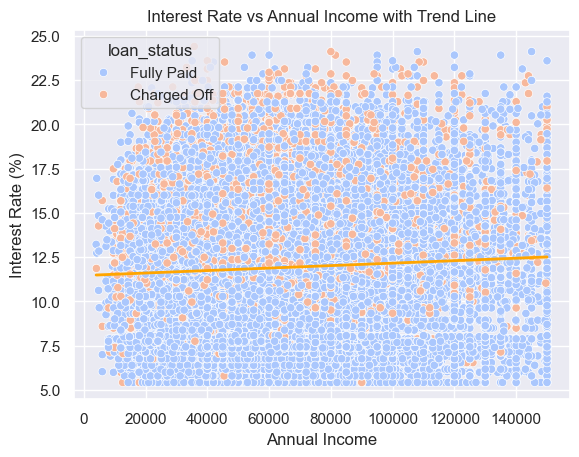

In [818]:
sns.scatterplot(data=loan_data, x='annual_inc', y='int_rate', hue='loan_status', palette='coolwarm')
sns.regplot(
    data=loan_data, 
    x='annual_inc',
    y='int_rate',
    scatter=False,  # Disable scatter points to avoid duplication
    color='orange',  # Color of the trend line
    line_kws={'linewidth': 2}
)

plt.title('Interest Rate vs Annual Income with Trend Line')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate (%)')
plt.show()

- Observation: The Charged off laons are higher when the interest rates are high for lower annual income group. This is understandable

#### Numerical vs categorical

C:\Users\ramar\AppData\Local\Temp\ipykernel_18424\3337574893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(loan_data, x='grade', y='int_rate',palette='coolwarm')


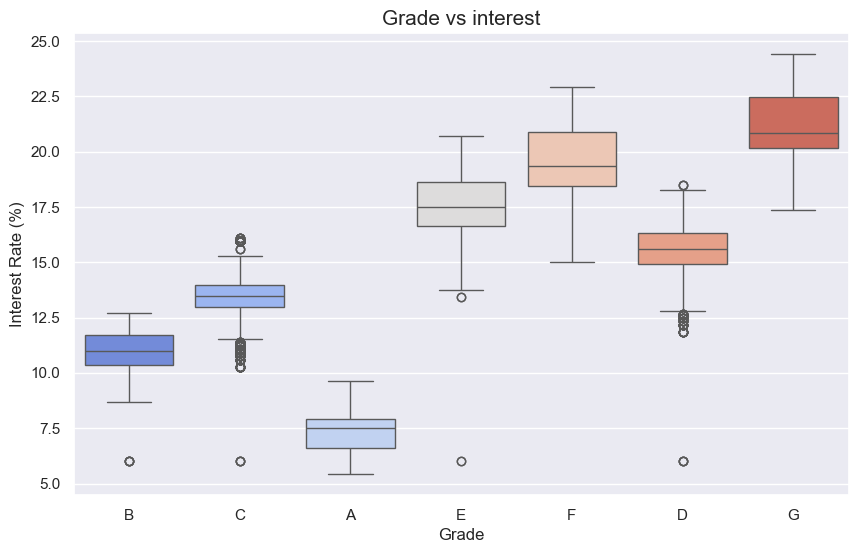

In [728]:
plt.figure(figsize=(10,6))
sns.boxplot(loan_data, x='grade', y='int_rate',palette='coolwarm')
plt.xlabel('Grade')
plt.ylabel('Interest Rate (%)')
plt.title('Grade vs interest', fontsize=15)
plt.show()

- The median interest rate go up with reducing grades which associates with lower confidence in the borrower in lower grade

##### Relation between Grade, dti and interest rate

In [822]:
dti_rate_pergrade = round(loan_data[['dti','grade','int_rate','revol_util_perc','loan_status']].groupby('grade').median('dti'),2)
dti_rate_pergrade

dti  int_rate  revol_util_perc
grade                                  
A      11.73      7.49            25.90
B      13.71     10.99            47.40
C      14.24     13.49            59.15
D      14.40     15.62            67.70
E      14.69     17.51            73.20
F      14.84     19.36            76.30
G      14.62     20.86            85.10

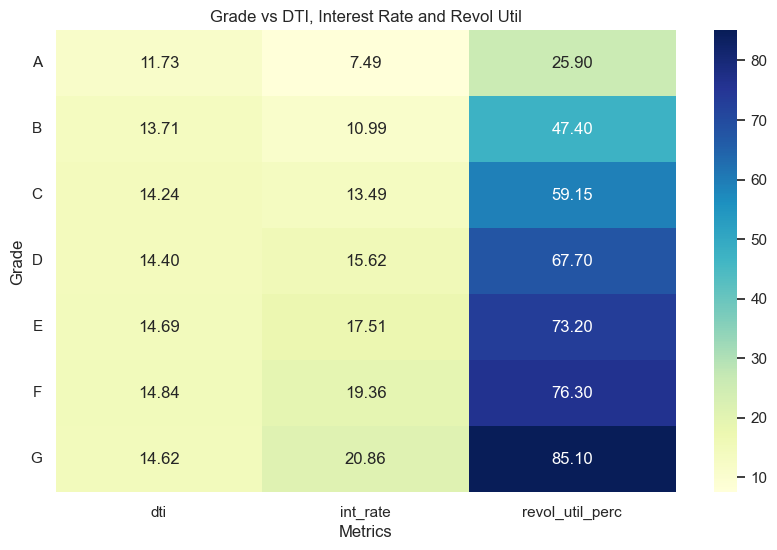

In [803]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dti_rate_pergrade, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Grade vs DTI, Interest Rate and Revol Util")
plt.xlabel("Metrics")
plt.ylabel("Grade")
plt.yticks(rotation=0)
plt.show()

 - Higher revolving utilization percentage relates inversely to the grades
 - Falling grades results in higher dti and higher interest rates

In [743]:
loan_data[['verification_status', 'int_rate']].groupby('verification_status').median('int_rate')

int_rate
verification_status          
Not Verified            11.12
Source Verified         11.71
Verified                12.69

- It is interesting that the un verified loan have lower interst rates and the verified loans have the highest. This does not seem to help much and hence may not be considered

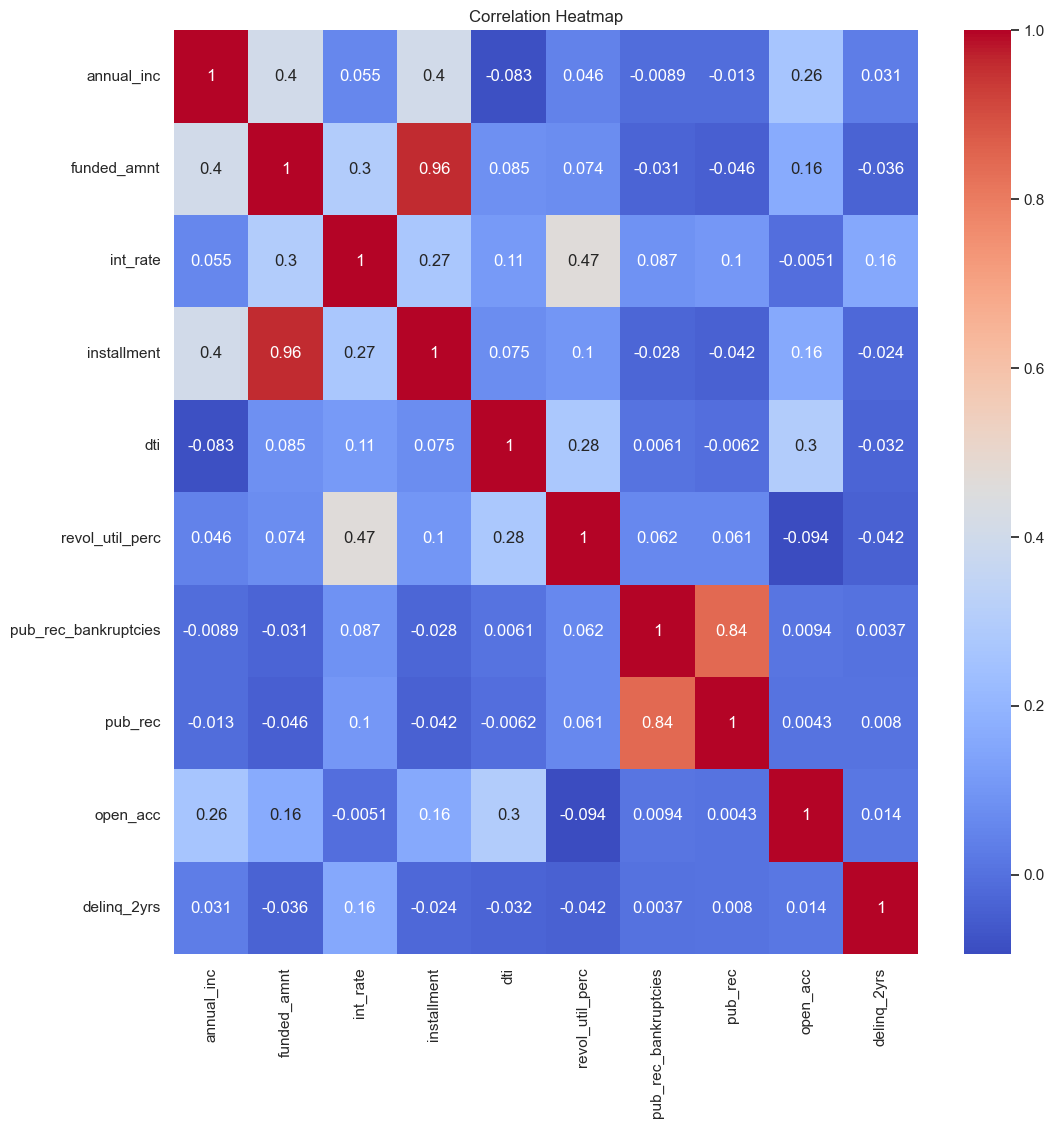

In [749]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables

# Correlation heatmap
plt.figure(figsize=(12, 12))
corr = loan_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
#sns.set(font_scale=0.8)
plt.title('Correlation Heatmap')
plt.show()


**Observations:**
- Annual income with DTI(Debt-to-income ratio) is negatively correalted.
  - Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
  - That means when annual income is low DTI is high & vice versa.
- DTI is moderately corelated to revolving line utilization rate which measures how much percentage of a borrower's available revolving credit (like credit cards or lines of credit) is currently being used
- Open credit line account are moderately correlated to DTI
  - This means that with increased in credit line accounts the DTI ration increases
- revolving line utilization has a good correlation with interest rate. Higher utilization may result in higher interest rates
- Higher approved loan amount results in high installments

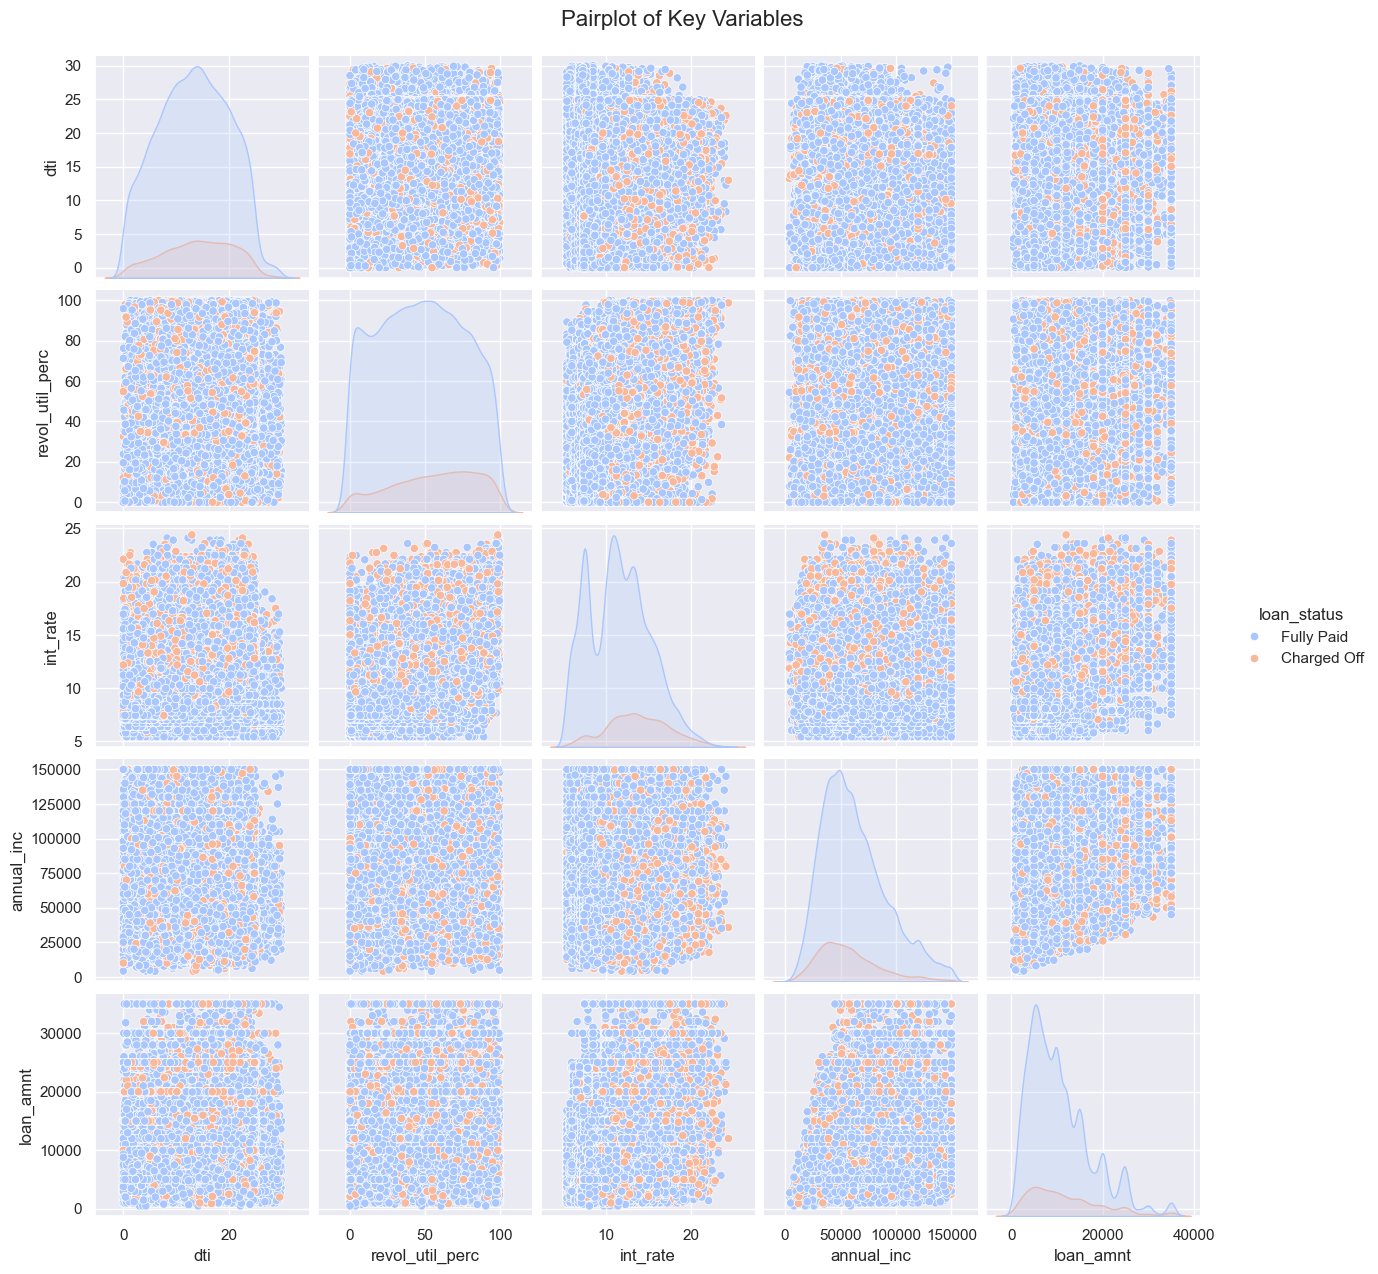

In [753]:
sns.pairplot(
    data=loan_data,
    vars=['dti', 'revol_util_perc', 'int_rate', 'annual_inc', 'loan_amnt'],
    hue='loan_status',
    palette='coolwarm',
    diag_kind='kde'
)
plt.suptitle('Pairplot of Key Variables', y=1.02, fontsize=16)
plt.show()

## Derived Metrics

In [758]:
from datetime import datetime

# Convert the 'earliest_cr_line' column to datetime
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)
loan_data['cr_hist_len'] = 2024 - loan_data.earliest_cr_line.dt.year

loan_data[['cr_hist_len','grade']].groupby('grade').mean('cr_hist_len')

cr_hist_len
grade             
A        28.656381
B        27.215030
C        26.552053
D        26.108745
E        26.512234
F        26.063123
G        26.212454

- Observation: Although marginal increase, longer earliest credit line 

C:\Users\ramar\AppData\Local\Temp\ipykernel_18424\2599343276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='loan_status', y='cr_hist_len', palette='coolwarm')
C:\Users\ramar\AppData\Local\Temp\ipykernel_18424\2599343276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data, x='grade', y='cr_hist_len', palette='coolwarm')


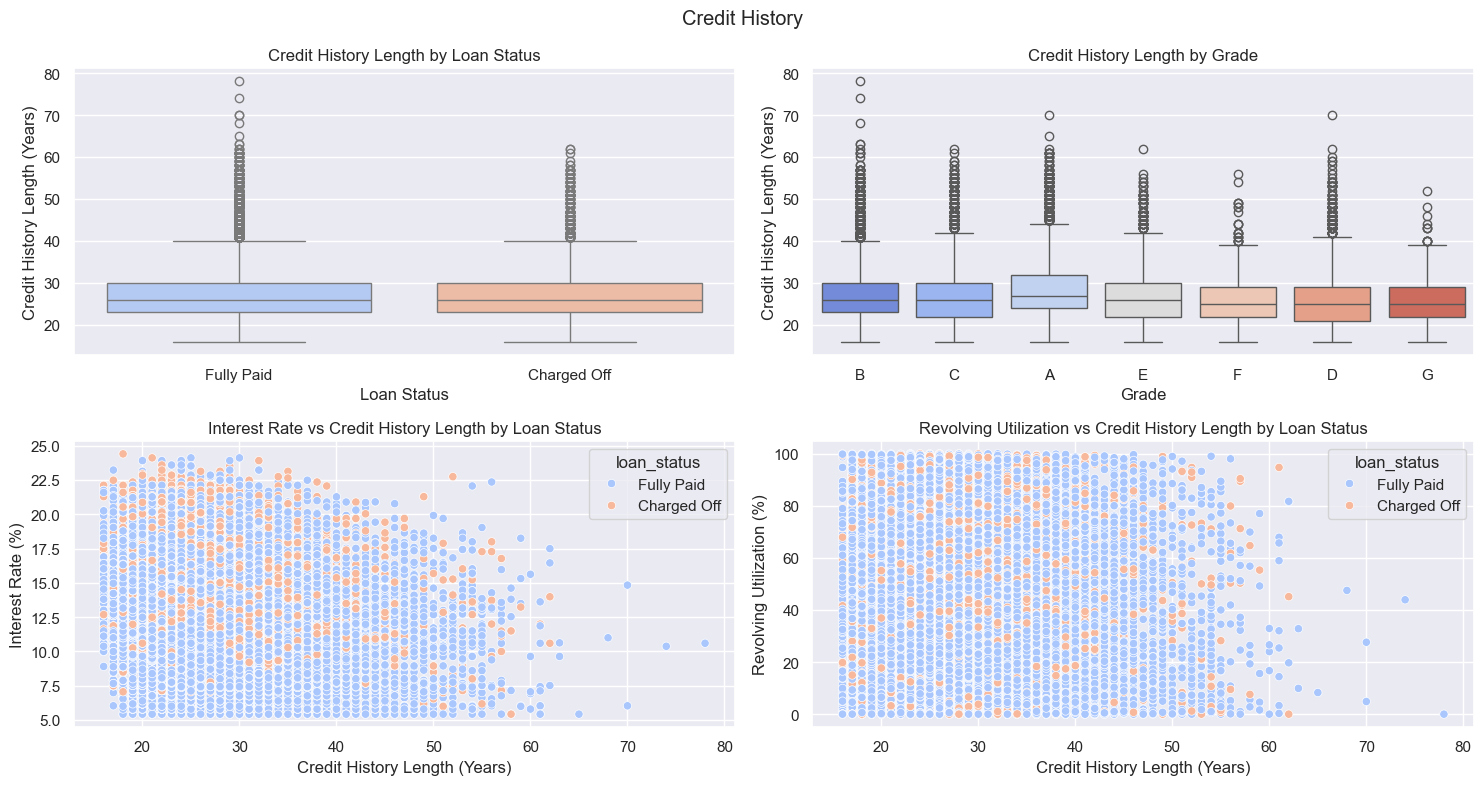

In [777]:
plt.figure(figsize=(15,8))
plt.suptitle("Credit History")
plt.subplot(2,2,1)
sns.boxplot(data=loan_data, x='loan_status', y='cr_hist_len', palette='coolwarm')
plt.title('Credit History Length by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit History Length (Years)')

plt.subplot(2,2,2)
sns.boxplot(data=loan_data, x='grade', y='cr_hist_len', palette='coolwarm')
plt.title('Credit History Length by Grade')
plt.xlabel('Grade')
plt.ylabel('Credit History Length (Years)')

plt.subplot(2,2,3)
sns.scatterplot(data=loan_data, x='cr_hist_len', y='int_rate', hue='loan_status', palette='coolwarm')
plt.title('Interest Rate vs Credit History Length by Loan Status')
plt.xlabel('Credit History Length (Years)')
plt.ylabel('Interest Rate (%)')

plt.subplot(2,2,4)
sns.scatterplot(data=loan_data, x='cr_hist_len', y='revol_util_perc', hue='loan_status', palette='coolwarm')
plt.title('Revolving Utilization vs Credit History Length by Loan Status')
plt.xlabel('Credit History Length (Years)')
plt.ylabel('Revolving Utilization (%)')

plt.tight_layout()
plt.show()

Observation:
- Although not clearly evident, borrowers with higher meidan credit history have better grades

## Final Observations:

#### Major influencing factors in predicting defaults
- High dti and revol_util: Borrowers relying heavily on credit are more likely to default.
  - dti (>14%%) and revolving untilization (> 60%)
- High int_rate: Interest rates >15% are strongly associated with defaults.
- Lower Grades (D, E, F): Significantly higher default rates compared to higher grades at 22-35%
- Borrowers with lower annual income (40000-80000) coupled with high interest rates >15%  have a high probaility of defaulting
- Higher tenure loans (60 monnths) are 25% at risk of defaulting
- Number of open credit lines has negative impact on dti and thus may impact grades resulting in higher rate of interests

#### Recommendations to Reduce Defaults
- Set stricter thresholds for dti (e.g., <30%) and revol_util (e.g., <50%).
- Increase interest rates further for lower grades (D, E, F) to account for higher risks.
- Offer incentives (lower rates) for borrowers with lower dti and revol_util.
- Focus on thorough income verification, especially for renters and lower-income borrowers.
- Regularly monitor borrowers with high revolving utilization for signs of distress.
- Reduce exposure to high-risk purposes such as small business loans.
- Limit loan amounts for low-income borrowers in high-risk grades.